<a href="https://colab.research.google.com/github/JaebinChoi/Recommendation-System/blob/master/ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 드라이브 내 폴더 접근

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


### 영화 평점 데이터 분석

In [ ]:
import pandas as pd;

path = '/gdrive/My Drive/Recommend'

In [ ]:
# Data Read
ratings = pd.read_csv('%s/data/ml-latest-small/ratings.csv' % path)

# Sampling
ratings.sample()

,userId,movieId,rating,timestamp
81816,517,40339,0.5,1488398916


In [ ]:
# 데이터 개수, Column  수
ratings.shape

(100836, 4)

In [ ]:
# 유저 데이터 개수
len(ratings['userId'].unique())

# 영화 데이터 개수
len(ratings['movieId'].unique())

ratings['rating'].describe()
# mean : 평균
# std  : 편차

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

### 데이터 시각화

In [ ]:
# 시각화를 화면에 띄우기 위해
%matplotlib inline

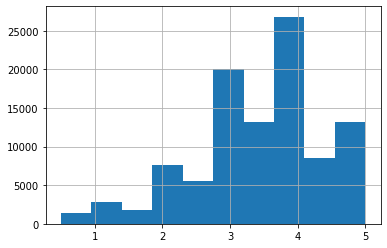

In [ ]:
# 파이썬도 matplotlib 기반
ratings['rating'].hist()

### 사람들은 평균적으로 몇 개의 영화에 대해 평점을 남겼는가?

In [ ]:
users = ratings.groupby('userId')['movieId'].count()
users[:5]

userId
1    232
2     29
3     39
4    216
5     44
Name: movieId, dtype: int64

In [ ]:
users.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


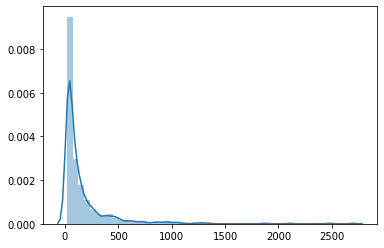

In [ ]:
# power law distribution, 멱함수 분포
sns.distplot(users.values)

### 사람들이 많이 보는 영화는?

In [ ]:
films = ratings.groupby('movieId')['userId'].count()
films[:5]

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [ ]:
films.describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: userId, dtype: float64

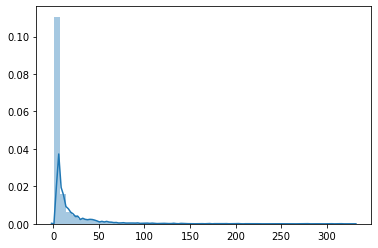

In [ ]:
sns.distplot(films.values)

In [ ]:
films.sort_values(ascending=False)[:5]

movieId
356     329
318     317
296     307
593     279
2571    278
Name: userId, dtype: int64

In [ ]:
movies = pd.read_csv('%s/data/ml-latest-small/movies.csv' % path, index_col='movieId')

In [ ]:
# movies.loc[index, column]
movies.loc[[356, 318, 296, 593, 2571]]

,title,genres
movieId,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War
318,"Shawshank Redemption, The (1994)",Crime|Drama
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


### 겨울왕국 평점보기

In [ ]:
movieId = 106696
movies.loc[movieId]

title                                         Frozen (2013)
genres    Adventure|Animation|Comedy|Fantasy|Musical|Rom...
Name: 106696, dtype: object

In [ ]:
frozen = ratings[ratings['movieId'] == movieId]
frozen[:5]

,userId,movieId,rating,timestamp
1245,10,106696,4.5,1455306204
3572,21,106696,4.0,1403460685
9418,63,106696,5.0,1443461176
16798,105,106696,3.5,1447563589
21852,141,106696,3.0,1513129988


In [ ]:
# 평점 개수
len(frozen)

29

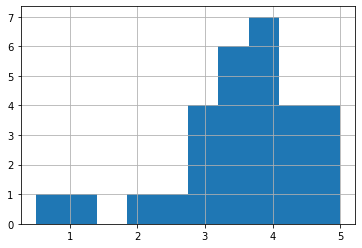

In [ ]:
# 겨울왕국의 평점 히스토그램
frozen['rating'].hist()

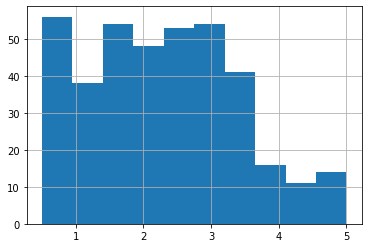

In [ ]:
# 겨울왕국 0.5점 준 사람의 평점 히스토그램
ratings.loc[ratings['userId'] == 567, 'rating'].hist()